## Generating tags using K Means clustering 

In [2]:
# Import statements
import numpy as np
import pandas as pd
import os
import sys
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import spacy
nltk.download('words')
from gensim.summarization.summarizer import summarize 
from gensim.summarization import keywords


[nltk_data] Downloading package words to C:\Users\Dharmang
[nltk_data]     Solanki\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [3]:
# Load the data into pandas frame
data_frame = pd.DataFrame()
nlp = spacy.load("en_core_web_sm")
for i in range(1,4,1):
    try:
        path = './data/articles'+str(i)+'.csv'
        if os.path.exists(path):
            chunk_list = []
            reader_obj = pd.read_csv(path,chunksize=10000) 
            for chunk in reader_obj:
                chunk_list.append(chunk)    
            data_frame = pd.concat([data_frame,pd.concat(chunk_list).drop(['Unnamed: 0'],axis=1)], ignore_index=True)
    except:
        # handle the file not found error
        print(sys.exc_info())
    
print(data_frame.columns)
print(data_frame.shape)

Index(['id', 'title', 'publication', 'author', 'date', 'year', 'month', 'url',
       'content'],
      dtype='object')
(142570, 9)


## Display a simple text

In [4]:
# Displaying a sample content
sample_content = data_frame['content'][0]
print(len(sample_content))

5607


# Tokenization
### Tokenizations is the process of separating each and every small letter of the sentence.

In [5]:
def tokenization(content):
    tokenizer = RegexpTokenizer(r'\w+')
    token_list = tokenizer.tokenize(content.lower())
    return token_list
token_list = tokenization(sample_content)
print(len(token_list))

880


# Removal of Stop Words: 
### In this process we are also eliminating the stop words in order to extract only words 

In [6]:
from nltk.corpus import stopwords
from nltk.corpus import wordnet
def stop_words_filter(token_list):
    stopword_set = set(stopwords.words('english'))    
    filtered_tokens = []
    for token in token_list:
        if (token not in stopword_set 
        and token.isnumeric() == False 
        and wordnet.synsets(token) != [] 
        and token.isalpha()
        and len(token)>1):
            filtered_tokens.append(token)
            
    return filtered_tokens

print(len(token_list))
filtered_tokens = stop_words_filter(token_list)
print(len(filtered_tokens))

880
471


### As you can see we were able to remove a lot of unnecessary words from the tokens

### Stemming and lemmatization
#### For grammatical reasons, documents are going to use different forms of a word, such as organize, organizes, and organizing. Additionally, there are families of derivationally related words with similar meanings, such as democracy, democratic, and democratization. In many situations, it seems as if it would be useful for a search for one of these words to return documents that contain another word in the set.

#### The goal of both stemming and lemmatization is to reduce inflectional forms and sometimes derivationally related forms of a word to a common base form. For instance:

#### &emsp;  &emsp; am, are, is $\Rightarrow$ be
#### &emsp;  &emsp; car, cars, car's, cars' $\Rightarrow$ car
#### The result of this mapping of text will be something like:
#### &emsp;  &emsp; the boy's cars are different colors $\Rightarrow$
#### &emsp;  &emsp; the boy car be differ color
#### However, the two words differ in their flavor. Stemming usually refers to a crude heuristic process that chops off the ends of words in the hope of achieving this goal correctly most of the time, and often includes the removal of derivational affixes. Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma . If confronted with the token saw, stemming might return just s, whereas lemmatization would attempt to return either see or saw depending on whether the use of the token was as a verb or a noun. The two may also differ in that stemming most commonly collapses derivationally related words, whereas lemmatization commonly only collapses the different inflectional forms of a lemma. Linguistic processing for stemming or lemmatization is often done by an additional plug-in component to the indexing process, and a number of such components exist, both commercial and open-source.

#### For more information refer: https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html

### NOTE: In the below method if you uncomment the two print lines you will be able to see what this function is doing. This will help to improve the performance of count-based clustering techniques. Also it will reduce the size of sparse matrix.

#### Example there are many examples which are being lemmatized like 
##### eg 1 . rounds => round 
##### eg 2 . leases => lease
##### eg 3 . jobs => job
##### eg 4 . appointees => appointee


In [7]:
# Lemmatization 
def lemmatize_tokens(filtered_tokens):
    lemmatized = []
    lemmatizer = WordNetLemmatizer()
    for token in filtered_tokens:
        lemmatized.append(lemmatizer.lemmatize(token))
        #print("token: " + token)
        #print("Lemmantized "+lemmatizer.lemmatize(token))
    return lemmatized
lemmatized = lemmatize_tokens(filtered_tokens)

In [8]:
def summarize_text(data):
    summ = summarize(data, ratio = 0.05) 

In [9]:
def find_nouns(content,isTokens=True):
    if isTokens:
        doc = nlp(' '.join(content))
    else:
        doc = nlp(content)
    tokens = []
    for index in range(len(doc)):
        if doc[index].pos_ == 'NOUN' or doc[index].pos_ == 'PROPN':
            tokens.append(doc[index].text)
    return tokens
nouns = find_nouns(lemmatized)
print(nouns)

['washington', 'congressional', 'republican', 'new', 'fear', 'health', 'care', 'lawsuit', 'administration', 'trump', 'administration', 'branch', 'suit', 'challenge', 'administration', 'authority', 'dollar', 'health', 'insurance', 'subsidy', 'american', 'handing', 'house', 'republican', 'victory', 'issue', 'loss', 'subsidy', 'health', 'care', 'program', 'implode', 'people', 'health', 'insurance', 'republican', 'replacement', 'lead', 'chaos', 'insurance', 'market', 'backlash', 'republican', 'control', 'government', 'stave', 'outcome', 'republican', 'position', 'sum', 'health', 'care', 'law', 'voter', 'end', 'law', 'year', 'twist', 'trump', 'administration', 'branch', 'prerogative', 'choose', 'republican', 'ally', 'house', 'central', 'question', 'dispute', 'eager', 'avoid', 'pileup', 'republican', 'capitol', 'hill', 'trump', 'transition', 'team', 'lawsuit', 'election', 'put', 'limbo', 'february', 'united', 'state', 'court', 'appeal', 'district', 'columbia', 'circuit', 'divulge', 'strategy

In [49]:
# Create a data pipeline to process the dataset 

def data_preprocessing(data_frame):

    res = pd.DataFrame(columns=['id','content'])
    '''

    # Step 1: Tokenization
    tmp_data_frame = data_frame['content'][0:1000].apply(lambda row:tokenization(row))

    # Step 2: Remove stop words
    tmp_data_frame = tmp_data_frame.apply(lambda row: stop_words_filter(row))

    # Step 3: Make a string
    tmp_data_frame = tmp_data_frame.apply(lambda row: ' '.join(row))

    res = pd.concat([res,tmp_data_frame])

    '''
    total_records = len(data_frame)  #50000
    start = 0 
    interval = ((total_records - start) // 50 ) #1000
    # The processing in chunks will reduce the memory load
    for i in range(start,total_records,interval):
        print(i)
        # Step 1: Shorten the text
        if(i+interval < total_records):
            tmp_data_frame = data_frame['content'][i:i+interval].apply(lambda row:row[:500])
        else:
            tmp_data_frame = data_frame['content'][i:total_records].apply(lambda row:row[:500])
        
        # Step 3: Tokenize the text
        tmp_data_frame = tmp_data_frame.apply(lambda row: tokenization(row))

        # Step 2: find Nouns and Pronouns
        tmp_data_frame = tmp_data_frame.apply(lambda row: find_nouns(row))
        
        # Step 4: Remove stop words
        tmp_data_frame = tmp_data_frame.apply(lambda row: stop_words_filter(row))
        
        # Step 5: Lemmitize tokens
        tmp_data_frame = tmp_data_frame.apply(lambda row: lemmatize_tokens(row))
                
        # Step 6: Make a string
        tmp_data_frame = tmp_data_frame.apply(lambda row: ' '.join(row))

        #print(tmp_data_frame.to_frame())
        res = pd.concat([res,tmp_data_frame.to_frame()])
        
    res.columns = ['doc_id','content']
    res['doc_id'] = range(0,total_records)
    return res

df = data_preprocessing(data_frame)


0
2851
5702
8553
11404
14255
17106
19957
22808
25659
28510
31361
34212
37063
39914
42765
45616
48467
51318
54169
57020
59871
62722
65573
68424
71275
74126
76977
79828
82679
85530
88381
91232
94083
96934
99785
102636
105487
108338
111189
114040
116891
119742
122593
125444
128295
131146
133997
136848
139699
142550


In [50]:
df.to_csv('intermediate_dataframe.csv', sep=',', encoding='utf-8',index=False)

In [51]:
df = pd.read_csv('intermediate_dataframe.csv')

In [52]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
vectorizer = TfidfVectorizer(max_df=0.3,use_idf=True,norm=u'l2',smooth_idf=True)
sparse_mat = vectorizer.fit_transform(df['content'].apply(lambda x: np.str_(x)))
word_features = vectorizer.get_feature_names()

In [53]:
word_features

['aa',
 'aaa',
 'aahs',
 'aalborg',
 'aalto',
 'aarhus',
 'aaron',
 'aarp',
 'ab',
 'aba',
 'aback',
 'abacus',
 'abadan',
 'abandon',
 'abandoning',
 'abandonment',
 'abashed',
 'abate',
 'abatement',
 'abattoir',
 'abaya',
 'abb',
 'abbe',
 'abbey',
 'abbot',
 'abbreviation',
 'abc',
 'abdication',
 'abdomen',
 'abdominal',
 'abduction',
 'abductor',
 'abducts',
 'abed',
 'abel',
 'abele',
 'aberdeen',
 'aberration',
 'abet',
 'abeyance',
 'abhorrent',
 'abhors',
 'abide',
 'abides',
 'abiding',
 'abidjan',
 'abilene',
 'ability',
 'abjection',
 'abkhazia',
 'ablation',
 'ablaze',
 'able',
 'ableism',
 'abnegation',
 'abnormality',
 'abo',
 'abode',
 'abolish',
 'abolishment',
 'abolition',
 'abolitionist',
 'abomination',
 'abor',
 'aboriginal',
 'aborigine',
 'abort',
 'abortifacient',
 'abortion',
 'abortionist',
 'abortive',
 'abound',
 'abraham',
 'abrasion',
 'abreast',
 'abridgment',
 'abruptness',
 'abscess',
 'abscondment',
 'abseiling',
 'absence',
 'absent',
 'absentee',
 

In [54]:
print(sparse_mat)
word_features = vectorizer.get_feature_names()

  (0, 14948)	0.17769033545195204
  (0, 13393)	0.14727174034493593
  (0, 27468)	0.1585417275511699
  (0, 12245)	0.11134042199165556
  (0, 757)	0.1302673864569658
  (0, 24757)	0.5024159330875646
  (0, 13111)	0.19126560702816314
  (0, 7595)	0.17535481203763661
  (0, 2487)	0.22025575527187788
  (0, 1615)	0.1491073107947321
  (0, 24835)	0.1987733092851324
  (0, 3121)	0.22058623144973258
  (0, 26510)	0.07777362297962262
  (0, 291)	0.3949396474762083
  (0, 14332)	0.17517435510092974
  (0, 3929)	0.15675321290834943
  (0, 11662)	0.2881258987352659
  (0, 9307)	0.18519289223970817
  (0, 21244)	0.1220334873389583
  (0, 5435)	0.22409423323403355
  (0, 27788)	0.11772884002698218
  (1, 22267)	0.16575567272379563
  (1, 8153)	0.1359479463504187
  (1, 4688)	0.2144438864706138
  (1, 28537)	0.11108103147250166
  :	:
  (142568, 1909)	0.31875124508834546
  (142568, 27190)	0.2001733594645491
  (142568, 10872)	0.11012567095603495
  (142568, 17182)	0.09530368072899581
  (142568, 24312)	0.0818354919741336
  (14

In [55]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=100)
sparse_mat_svd = svd.fit_transform(sparse_mat)

In [56]:
from matplotlib import pyplot as plt
from sklearn import metrics
from collections import Counter
from sklearn.cluster import MiniBatchKMeans
sse = []
davies_score =[]

list_k = list(range(2, 20))
for k in list_k:
    kmeans = MiniBatchKMeans(n_clusters = k).fit(sparse_mat)
    l = kmeans.labels_
    result = metrics.davies_bouldin_score(sparse_mat_svd, l)
    davies_score.append(result)
    sse.append(kmeans.inertia_)

#kmeans = MiniBatchKMeans(n_clusters = 20).fit(sparse_mat)
#kmeans = KMeans(20,init='k-means++', max_iter=100, n_init=1,random_state=0).fit(sparse_mat)

labels = kmeans.labels_

In [57]:
#result = metrics.davies_bouldin_score(sparse_mat.toarray(),labels)
#print(result)

In [58]:
#import pickle
#filename = 'kmeans.pickle'
#pickle.dump(kmeans, open(filename, 'wb'))

In [59]:
# load the model from disk
#kmeans = pickle.load(open(filename, 'rb'))
#print(result)

In [60]:
#print(sparse_mat)
#print(len(word_features))

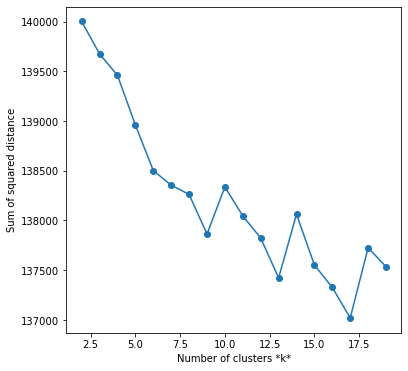

In [61]:
#Plot sse against k

plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');
plt.savefig('results/20ClustersSSE.png')



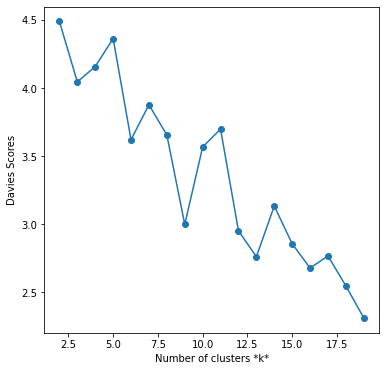

In [62]:

plt.figure(figsize=(6, 6))
plt.plot(list_k, davies_score, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Davies Scores');
plt.savefig('results/DaviesScore_20Clusters.png')


In [63]:
print("Optimal Cluster size: "+ str(list_k[np.argmin(davies_score)]))

print(sse)

Optimal Cluster size: 19
[140000.70245445342, 139674.50023783237, 139459.13418717778, 138959.6950434804, 138502.19398106507, 138354.26277161165, 138262.5143625125, 137863.476923414, 138337.79093383017, 138045.0748560314, 137823.79504846397, 137422.22339892352, 138062.74732670936, 137552.47222173796, 137326.39650991617, 137019.81136427526, 137726.13602140773, 137534.2979711969]


In [64]:
#find the topic name
clusters = []
for i in range(0,20,1):
    cluster_tuple = np.where(labels == i)
    clusters.append(cluster_tuple[0])

In [66]:
print(len(clusters[2]))
# centers of the clusters
centers = kmeans.cluster_centers_.argsort()[:,::-1]
terms = vectorizer.get_feature_names()
tags = []
for i in range(0,19):
    word_list=[]
    print("Cluster ID %d:"% i)
    for j in centers[i,:10]:
        word_list.append(terms[j])
    print(word_list) 
    tags.append(word_list)

3916
Cluster ID 0:
['ermine', 'downtrodden', 'resplendent', 'headdress', 'braid', 'goddess', 'vibe', 'attendant', 'cape', 'crystal']
Cluster ID 1:
['sander', 'clinton', 'hillary', 'percent', 'poll', 'sen', 'state', 'campaign', 'candidate', 'primary']
Cluster ID 2:
['court', 'supreme', 'judge', 'justice', 'case', 'president', 'appeal', 'law', 'trump', 'decision']
Cluster ID 3:
['house', 'republican', 'senate', 'care', 'bill', 'health', 'democrat', 'committee', 'act', 'president']
Cluster ID 4:
['clinton', 'hillary', 'trump', 'campaign', 'email', 'nominee', 'state', 'election', 'president', 'candidate']
Cluster ID 5:
['police', 'officer', 'man', 'shooting', 'city', 'department', 'people', 'suspect', 'attack', 'woman']
Cluster ID 6:
['trump', 'president', 'house', 'campaign', 'white', 'administration', 'news', 'state', 'washington', 'republican']
Cluster ID 7:
['un', 'beneficiary', 'poison', 'pill', 'dictator', 'day', 'civilian', 'regime', 'aid', 'truck']
Cluster ID 8:
['warren', 'pocahon